# Normal Ecuation: Code & Simple Test

## Carga de librerías

Primero se cargan las librerias que serán utilizadas para el algoritmo y la prueba de este:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

## Normal Ecuation Function 

Posteriormente se crea el código del algoritmo, para ello se parte de la ecuación normal de para obtener directamente el vector de bias y pesos: $\hat\theta$:

### $$\hat\theta = (X^TX)^{-1}X^Ty$$

La función creada toma por nombre ``normal_equation()``, y su descripción se encuentra dentro de la misma, el resultado final de esta se encuentra, por facilidad, en el archivo **"multivariate_linear_regression.py"** , desde el cual será llamada para su aplicación. 

Los argumentos de la función **X** y **Y** son DataFrames de Pandas, pues facilita la separación de los datos en training y test mediante la funión ``df.iloc[]``.

In [4]:
def normal_equation(X, Y, percent):
    '''Esta función sirve para utilizar el método de regresión lineal con ecuación normal
    normal_equation(X, Y, percent): 
    X: Matriz columna de inputs 
    Y: Matriz columna de outputs
    percent: % de datos que seran utilizados para el test (base 100)
    
    Return: theta, test_index, train_index, Y_predict
    
    test_index: indices de los valores utilizados para el test
    train_index: indices de los valores utilizados para el entrenamiento
    theta: valores correspondientes a theta_n
    Y_predict: valores de Y obtenidos de la predicción
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    train_index = list(np.arange(0, m)) 
    
    for indice in test_index:
        train_index.remove(indice)

    X_train = np.c_[X.iloc[train_index]]
    X_test = np.c_[X.iloc[test_index]]
    Y_train = np.c_[Y.iloc[train_index]]
    Y_test = np.c_[Y.iloc[test_index]]
    
    # Entrenamiento
    m = len(X_train)
    
    X_b = np.c_[np.ones((m, 1)), X_train]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_train
    
    # test
    
    m = len(X_test)
    
    X_b_test = np.c_[np.ones((m, 1)), X_test]
    Y_predict = X_b_test @ theta
    
    return theta, test_index, train_index, Y_predict

### Prueba del algoritmo 

Para la prueba primero se crean las variables **x** y **y**, **x** es generada de manera aleatoria, y **y** a través de la función $y = 3 + 4x + c$, donde **c** es un número aleatorio que hace posible la generación de una nube de puntos al rededor de la recta.

In [8]:
m = 300
x = 2 * np.random.rand(m, 1)
y = 3 + 4*x + 1.5*np.random.randn(m, 1)

In [9]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)
sample = 20 # 20% de los datos son utilizados para test

Para utilizar la función deben escribirse todas las variables de salida, en caso de omitir alguna se asignaran en el mismo orden del **return**: _theta, test_index, train_index, Y_predict_.

In [10]:
theta, test_index, train_index, Y_predict = normal_equation(X, Y, sample)

In [23]:
print('theta', theta.tolist())
print('test_index:', len(test_index))
print('train_index:', len(train_index))

theta [[2.959801465840667], [3.958653260654691]]
test_index: 60
train_index: 240


Graficando los valores reales de **y** (nube de puntos) y los valores predichos por la función ``normal_equation()``

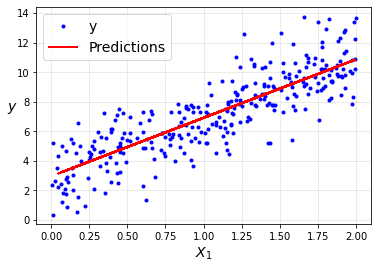

In [25]:
plt.plot(np.c_[X], np.c_[Y], "b.", label = 'y')
plt.plot(np.c_[X.iloc[test_index]], Y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.grid(alpha= 0.3)
plt.show()